<a href="https://colab.research.google.com/github/KNL1979/DS807/blob/main/Part2_Choosing_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading libraries

In [ ]:
!pip install joypy

In [ ]:
import tensorflow as tf

import pandas as pd
#import requests
import random
import gzip
import json
import io
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import joypy


from sklearn.model_selection import train_test_split
import psutil

# Setting up with Google Drive

In [ ]:
# Mount your google drive where you've saved your assignment folder
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Replace '------' with the path such that "DM890_assignment_1" is your working directory
%cd '/content/gdrive/My Drive/AML_Exam/Problem2'

/content/gdrive/.shortcut-targets-by-id/1osKmyrDLORFSpes1mwrU-W7OXM-to6bK/AML_Exam/Problem2


# Function to sample the data, and data paths

In [ ]:
def dataset_name(file_path):
  dataset_name = os.path.splitext(os.path.basename(file_path))[0].replace('_5.json', '')
  return dataset_name

In [ ]:
def loading_gz(file_path, printing = False, load_all = False, max_load_samples = np.inf, max_samples_per_cat = 2000):
  my_keys = ['overall', 'reviewText', 'summary']
  with gzip.open(file_path, 'rt', encoding='utf-8') as g:
          # Initialize an empty list to store sampled rows
          sampled_data = []
          for i, line in enumerate(g):
              if printing:
                if i % 1000 == 0:
                    print(i)
              data = json.loads(line)
              sampled_data.append({k: data[k] for k in my_keys & data.keys()})
              if i > max_load_samples:
                break
          sampled_data = pd.DataFrame(sampled_data)
          sampled_data.dropna(inplace = True)

          if load_all:
            return sampled_data

          nMax = sampled_data.groupby('overall').count().min()[0] * 3
          #my_max = min(nMax, 2000)
          res = sampled_data.groupby('overall').apply(lambda x: x.sample(n = min(nMax, len(x), max_samples_per_cat))).reset_index(drop = True)

          return res


In [ ]:
# List of file paths for your 29 datasets
file_paths_train = [
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/AMAZON_FASHION_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/All_Beauty_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Appliances_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Arts_Crafts_and_Sewing_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Automotive_5.json.gz',
    #'/content/gdrive/My Drive/AML_Exam/Problem2/data/Books_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/CDs_and_Vinyl_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Cell_Phones_and_Accessories_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Clothing_Shoes_and_Jewelry_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Digital_Music_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Electronics_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Gift_Cards_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Grocery_and_Gourmet_Food_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Home_and_Kitchen_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Industrial_and_Scientific_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Kindle_Store_5.json.gz',
    #'/content/gdrive/My Drive/AML_Exam/Problem2/data/Luxury_Beauty_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Magazine_Subscriptions_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Movies_and_TV_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Musical_Instruments_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Office_Products_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Patio_Lawn_and_Garden_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Pet_Supplies_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Prime_Pantry_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Software_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Sports_and_Outdoors_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Tools_and_Home_Improvement_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Toys_and_Games_5.json.gz',
    '/content/gdrive/My Drive/AML_Exam/Problem2/data/Video_Games_5.json.gz'
]

file_paths_test = '/content/gdrive/My Drive/AML_Exam/Problem2/data/Luxury_Beauty_5.json.gz'

data_path_dict = {dataset_name(k):k for k in file_paths_train}

# Target number of rows for each dataset
# target_rows = 1000

# Initialize an empty dictionary to store the sampled DataFrames
# sampled_datasets_dict = {}

# Loop over each file path
# for file_path in file_paths:
#     # Extract the dataset name from the file path
#     dataset_name = os.path.splitext(os.path.basename(file_path))[0].replace('_5.json', '')

#     # Check if the file exists
#     if os.path.exists(file_path):
#         # Call the sample_data function and store the result in the dictionary
#         sampled_data = sample_data(file_path, target_rows)
#         sampled_datasets_dict[dataset_name] = sampled_data[['overall', 'reviewText', 'summary']]

#     else:
#         print(f"File not found: {file_path}")


# Checking if GPU is available

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


#Vocab similarity

In [ ]:
def my_encoder(x_train, x_test = '', MAX_VOCAB_SIZE = 1000):
  encoder = tf.keras.layers.TextVectorization(max_tokens=MAX_VOCAB_SIZE)
  encoder.adapt(x_train)
  # vocab = np.array(encoder.get_vocabulary())

  encoded_x = encoder(x_train)

  if x_test:
    encoded_x_test = encoder(x_test)
    return encoded_x, encoded_x_test
  else:
    return encoded_x

In [ ]:
# with tf.device('/gpu:0'):
#   my_dict = {}
#   for dataset in data_path_dict:
#     print(dataset)
#     df = loading_gz(data_path_dict[dataset], max_load_samples = 50000, load_all = True)
#     x = df['reviewText']
#     encoder = tf.keras.layers.TextVectorization()
#     encoder.adapt(x)
#     my_dict[dataset] = {'size':len(x), 'vocab_size':encoder.vocabulary_size(), 'vocab':encoder.get_vocabulary()}

In [ ]:
# df_vocab = pd.DataFrame.from_dict(my_dict, orient = "index")
# df_vocab.rename(columns = {'size': 'review_counts'},inplace = True)
# df_vocab.to_json('/content/gdrive/My Drive/AML_Exam/Problem2/data/df_vocab.json')
df_vocab = pd.read_json('/content/gdrive/My Drive/AML_Exam/Problem2/data/df_vocab.json')
#df_vocab

In [ ]:
#vocab_size = 4000
#target_set = set(df_vocab['vocab'].iloc[-1][:vocab_size])
#df_vocab['vocab'].iloc[:-1].apply(lambda x: len(target_set-set(x[:vocab_size]))/vocab_size)

In [ ]:
#Final_Train = df_vocab.loc[['Arts_Crafts_and_Sewing','Prime_Pantry','All_Beauty']].sum()
#Final_Train['vocab'] = list(set(Final_Train['vocab']))
#df_vocab.loc['Final_Train'] = Final_Train
#df_vocab

In [ ]:
x = np.arange(100, 5100, 100)
y = {}
for vocab_size in x:
  target_set = set(df_vocab['vocab'].loc['Luxury_Beauty'][:vocab_size])
  y[vocab_size] = df_vocab['vocab'].drop('Luxury_Beauty').apply(lambda x: 1-(len(target_set-set(x[:vocab_size]))/vocab_size))

df = pd.DataFrame.from_dict(y, orient = 'index')

[Text(0.5, 0, 'Vocab size'), Text(0, 0.5, 'Luxury_Beauty vocab intersection')]

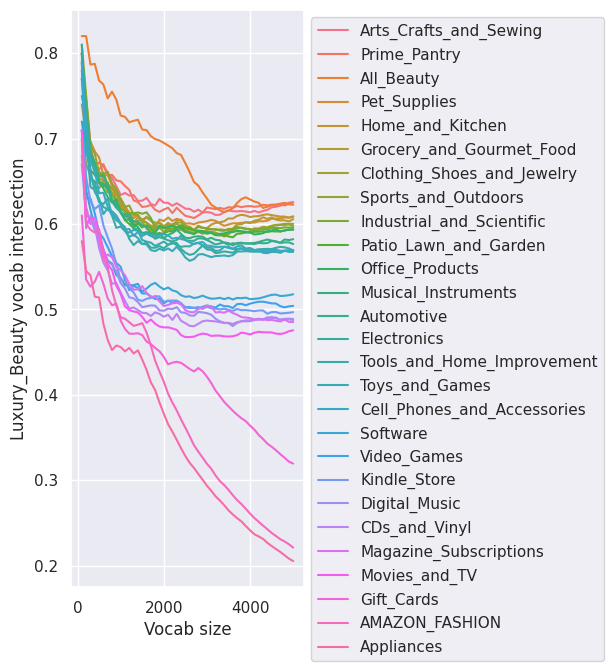

In [ ]:
#sns.figure(figsize=(4, 8))
sns.set(rc={'figure.figsize':(3,7.5)})
ax = sns.lineplot(df.sort_values(by=5000, axis =1, ascending=False), dashes=False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(xlabel='Vocab size', ylabel='Luxury_Beauty vocab intersection')

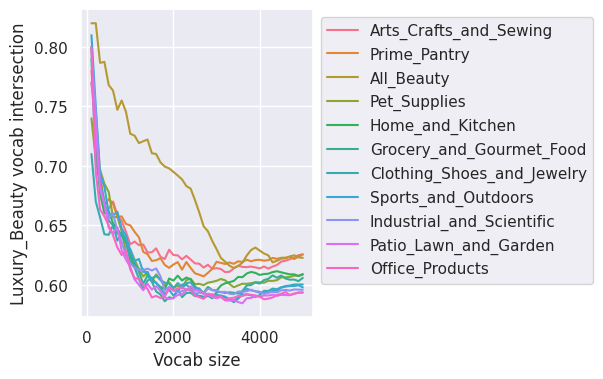

In [ ]:
sns.set(rc={'figure.figsize':(3,4)})
ax = sns.lineplot(df[df > 0.58].dropna(axis = 1).sort_values(by=5000, axis =1, ascending=False), dashes=False)
ax.set(xlabel='Vocab size', ylabel='Luxury_Beauty vocab intersection')
#ax.add_legend(label_order = ['0','-1','-2'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

We choose Arts_Crafts_and_Sewing, Prime_Pantry and All_Beauty, as their vocab is closet to Luxury_Beauty

# Checking length of reviews

In [ ]:
sns.reset_orig()

In [ ]:
# with tf.device('/gpu:0'):
#   my_dict = {}
#   for dataset in data_path_dict:
#     print(dataset)
#     df = loading_gz(data_path_dict[dataset], max_load_samples = 50000, load_all = True)
#     lengths = np.array(df['reviewText'].str.split(' ').apply(len))
#     my_dict[dataset] = {'lengths':lengths, 'mean_length':lengths.mean(), 'std_length':lengths.std()}

In [ ]:
# df = loading_gz(file_paths_test, max_load_samples = 50000, load_all = True)
# lengths = np.array(df['reviewText'].str.split(' ').apply(len))
# my_dict['Luxury_Beauty'] = {'lengths':lengths, 'mean_length':lengths.mean(), 'std_length':lengths.std()}

In [ ]:
# df_lengths = pd.DataFrame.from_dict(my_dict, orient = "index")
# df_lengths.to_json('/content/gdrive/My Drive/AML_Exam/Problem2/data/df_lengths.json')
df_lengths = pd.read_json('/content/gdrive/My Drive/AML_Exam/Problem2/data/df_lengths.json')
#sorted_df

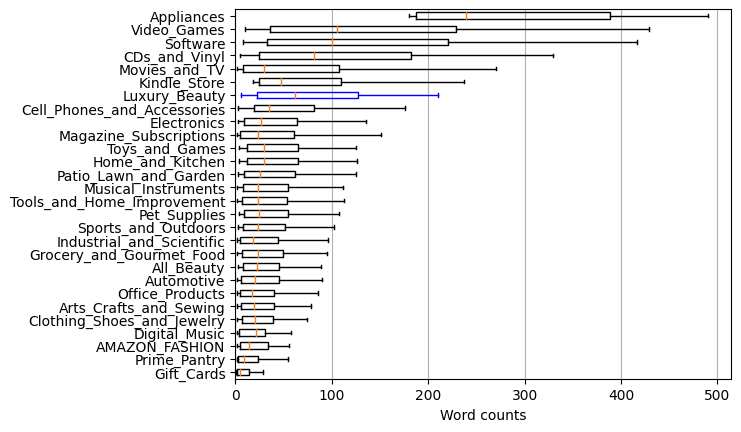

In [ ]:
df_lengths['dist_mean_length'] = (df_lengths['mean_length'] - df_lengths['mean_length']['Luxury_Beauty'])
df_lengths['dist_std_length'] = (df_lengths['std_length'] - df_lengths['std_length']['Luxury_Beauty'])
sorted_df = df_lengths.sort_values(by = ['mean_length', 'std_length'])

fig, ax = plt.subplots()

bplot = ax.boxplot(sorted_df['lengths'], whis = (10, 90), sym = "", vert = False, labels = sorted_df.index)

ax.set_xlabel('Word counts')
ax.grid(axis = 'x')
ax.set_xlim(left = 0)

LB_index = 21
LB_color = 'blue'
bplot['boxes'][LB_index].set_color(LB_color)
bplot['caps'][LB_index*2  ].set_color(LB_color)
bplot['caps'][LB_index*2+1].set_color(LB_color)
bplot['whiskers'][LB_index*2  ].set_color(LB_color)
bplot['whiskers'][LB_index*2+1].set_color(LB_color)

# score dist

In [ ]:
# with tf.device('/gpu:0'):
#   my_dict = {}
#   for dataset in data_path_dict:
#     print(dataset)
#     df = loading_gz(data_path_dict[dataset], max_load_samples = 50000, load_all = True)
#     scores = np.array(df['overall'].astype(int))
#     my_dict[dataset] = {'overall':scores}

In [ ]:
# df = loading_gz(file_paths_test, max_load_samples = 50000, load_all = True)
# scores = np.array(df['overall'].astype(int))
# my_dict['Luxury_Beauty'] = {'overall':scores}

In [ ]:
#df_scores = pd.DataFrame.from_dict(my_dict, orient = "index")
#df_scores.to_json('/content/gdrive/My Drive/AML_Exam/Problem2/data/df_scores.json')
df_scores = pd.read_json('/content/gdrive/My Drive/AML_Exam/Problem2/data/df_scores.json')

In [ ]:
df_score_dist = df_scores['overall'].apply(lambda x: pd.Series(x).value_counts(normalize = True))
df_score_dist = df_score_dist[[1,2,3,4,5]]

In [ ]:
df_score_dist.loc['Luxury_Beauty']

1    0.031971
2    0.043445
3    0.113285
4    0.228642
5    0.582657
Name: Luxury_Beauty, dtype: float64

Text(0, 0.5, 'Percentage')

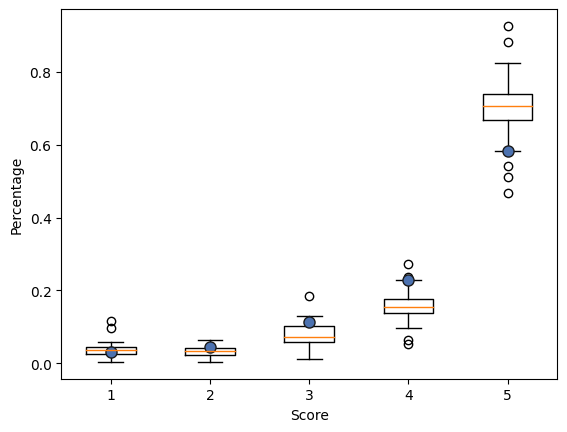

In [ ]:
fig, ax = plt.subplots()


ax.boxplot(df_score_dist)
ax.plot(df_score_dist.loc['Luxury_Beauty'], 'bo', markersize=8, markeredgecolor = 'k', fillstyle = 'full')

ax.set_xlabel('Score')
ax.set_ylabel('Percentage')